# **Aprendizaje no Supervisado**#
En esta práctica de laboratorio guiada, vamos a mostrar la implementación de los dos algoritmos aprendidos en los videos anteriores utilizando los recursos disponibles en la biblioteca sci-kit learn para Python.

Los paquetes que vamos a utilizar para esta demostración son los siguientes:

*   [Datasets](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets): Este paquete, nos ofrece varios de los datasets más famosos para el estudio de algoritmos de Machine Learning. Esta demostración en particular esta basada en el [Digits Dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html). Esta distribución de datos se compone de 1797 imágenes de 8x8. Cada imagen, es de un dígito escrito a mano. Esta imagen es presentada como vector de 64  características.
*   [Preprocessing](https://scikit-learn.org/stable/modules/preprocessing.html): Este paquete, proporciona algunas herramientas de estandarización (como mean removal and variance scaling), para preprocesar las distribuciones de datos a ser analizadas por los algoritmos de machine learning.
*   [Cluster](https://scikit-learn.org/stable/modules/clustering.html#): Este paquete, proporciona diferentes algoritmos utilizados para realizar una de las tareas clásicas del aprendizaje no supervisado (Clustering), entre ellos el algoritmo de [k-means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans). 
*   [Decomposition](https://scikit-learn.org/stable/modules/decomposition.html#decompositions): Este paquete, proporciona diferentes técnicas utilizadas para reducir la dimensionalidad de una distribución de datos, etre ellos el algoritmo de [Principal Component Analysis](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).

### **Paso No. 1**
Importación de bibliotecas y paquetes a utilizar



In [0]:
import numpy as np
import random
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelBinarizer


### **Paso No. 2**
Cargar y visualizar el dataset.

Dataset Shape =  (1797, 64)
Number of features =  (64,)

data = 
 [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]

reshaped data = 
 [[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]

Data visualization



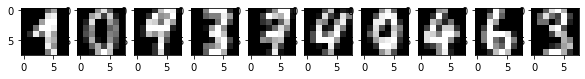

In [0]:
X_digits = load_digits()
print("Dataset Shape = ", X_digits.data.shape)
print("Number of features = ", X_digits.data[0].shape)
print("\ndata = \n", X_digits.data[0])
print("\nreshaped data = \n", X_digits.data[0].reshape((8,8)))
print("\nData visualization\n")
plt.rcParams["figure.figsize"] = [10, 10]
plt.gray()
for i in range(0,10):
  index = random.randint(0, len(X_digits.data))
  plt.subplot(1,10,i+1)
  plt.imshow(X_digits.data[index].reshape((8,8)))


### **Paso No. 3**
Preprocesamiento de los datos.


Scaled Data visualization



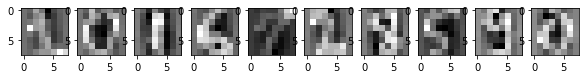

In [0]:
data = scale(X_digits.data)

print("\nScaled Data visualization\n")
for i in range(0,10):
  index = random.randint(0, len(data))
  plt.subplot(1,10,i+1)
  plt.imshow(data[index].reshape((8,8)))


### **Paso No. 4**
Reducción de dimensionalidad utilizando PCA. En este paso estamos reduciendo de 64 a 2 dimensiones nuestra distribución de datos.

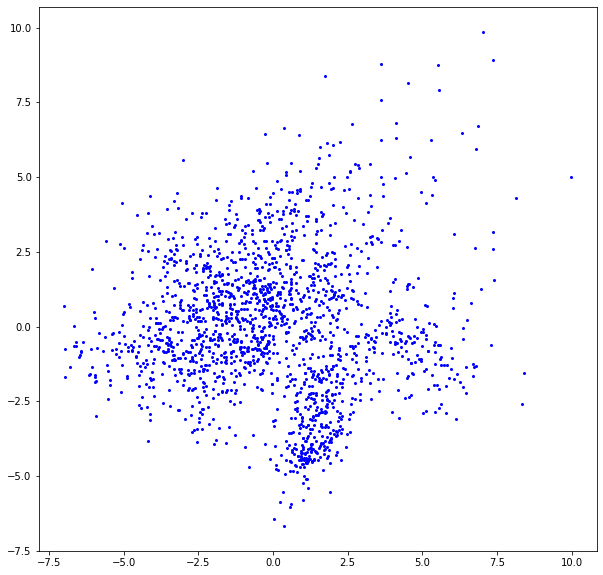

In [0]:
reduced_data = PCA(n_components=2).fit_transform(data)
plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'bo', markersize=2)

### **Paso No. 5**
Aplicar el algoritmo de k-means, para encontrar los centroides y el número de cluster al que cada uno de los datos pertenece. 

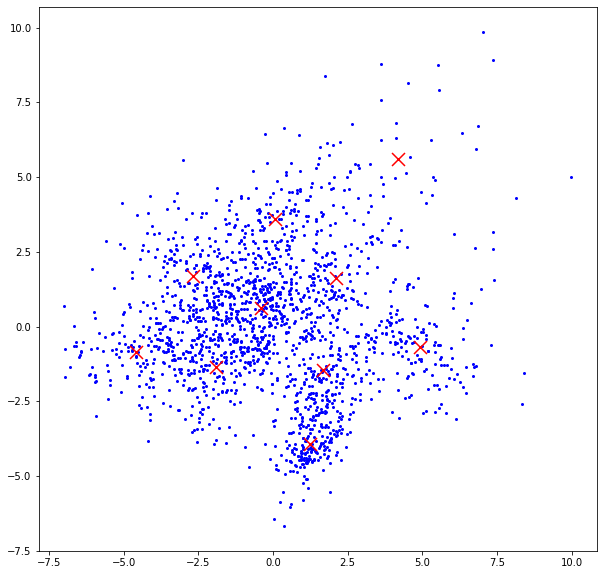

In [0]:
kmeans = KMeans(init='k-means++', n_clusters= 10)
kmeans.fit(reduced_data)
centroids = kmeans.cluster_centers_
c_data = kmeans.predict(reduced_data)

plt.figure(1)
plt.clf()
plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'bo', markersize=2)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=5,
            color='r', zorder=10)

### **Paso No. 6**
Representamos los datos como una sparse representation a través de one-hot encoding.

In [0]:
label_binarizer = LabelBinarizer()
label_binarizer.fit(range(max(c_data)+1))
h = label_binarizer.transform(c_data)

print("c_data = ",c_data[0:19])
print("h = \n",h[0:9])


c_data =  [4 8 4 5 7 5 2 3 5 8 7 0 5 1 7 1 2 0 3]
h = 
 [[0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]]


### **Paso No. 7**
Asignamos los datos al clúster asociado.

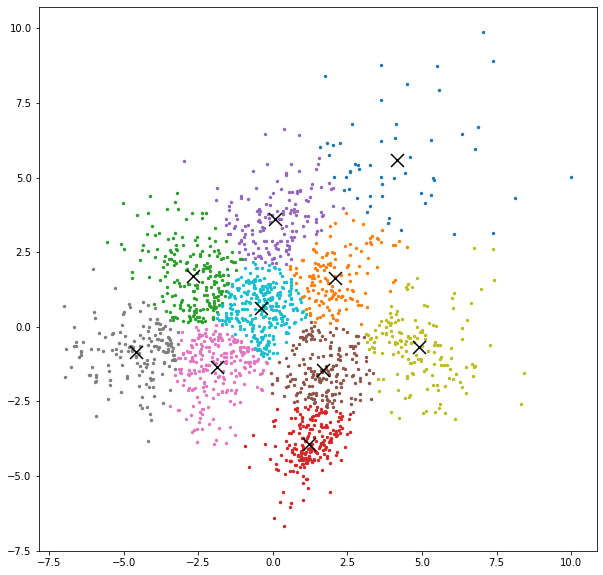

In [0]:
clusters = []
for i in range (0,10):
  clusters.append(reduced_data[c_data == i])

plt.figure(2)
plt.clf()

color_codes = ['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10']

for i in range (0,10):
  plt.scatter(clusters[i][:, 0], clusters[i][:, 1], marker='o', s=2, linewidths=2, color=color_codes[i])
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=169, linewidths=5, color='k', zorder=10) 


# **Iris Flower Dataset**#
Utilizando el [Iris Dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set), utilice las herramientas anteriormente mostradas en este tutorial para separar la distribución de datos, en los 3 diferentes tipos de esta flor (Setosa, Versicolour, y Virginica). Esta distribución de datos esta compuesta por una matriz de 150x4, es decir, contiene 150 muestras con 4 características cada una.

In [0]:
from sklearn.datasets import load_iris

X_iris = load_iris()
print("Dataset Shape = ",X_iris.data.shape)
print("\n10 samples of Irist Dataset\n")
print(X_iris.data[0:9,:])

Dataset Shape =  (150, 4)

10 samples of Irist Dataset

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]]


### **Parte No. 1**
Separe la distribución de datos utilizando el algoritmo de k-means, reduciendo la dimensionalidad de los datos a 3 dimensiones.

In [0]:
#### your code here ####

### **Parte No. 2**
Separe la distribución de datos utilizando el algoritmo de k-means, reduciendo la dimensionalidad de los datos a 2 dimensiones.

In [0]:
#### your code here ####